# All About Linux

## Distro

- a packaged version of Linux that a group of individuals or a company develops. It includes the core operating  system functionality (kernel) and additional complementary tools and software applications.

## Major components

### Kernel


- A controller of all services in the operating syste,
- Scheduling of processor time
- Memory allocation for the operating system and applications
- Access to peripheral devices

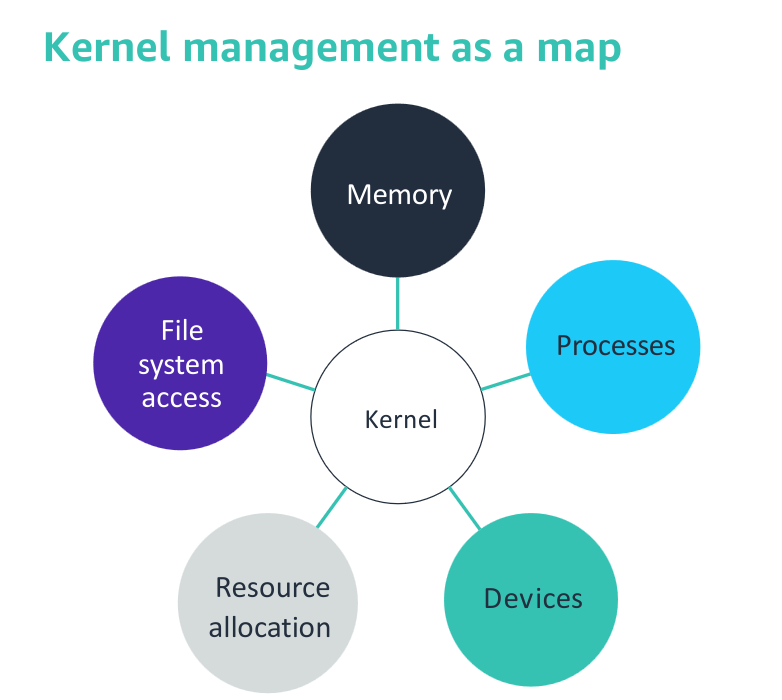

### Daemons

- Computer programs running in the backgrounds and kernel-level (ring 0).
- Provides a system service. Usually the process name ends in *d* (syslogd,sshd,dockerd)

### Applications

### Data Files

### Configuration Files
- Stored in `/etc`. Has all initial settings or stores values for a system program.
- Extensions include: .cnf, .conf, .cfg, .cf, .ini

### Shell

- Allows user to input commands to execute services, invoke changes, among other things that can be done with a GUI.

## Users and Groups

### Users
- Individual accounts that can own files and run processes.

### Groups
- Collections of users that share common permissions.

### Users in Linux

#### Root User (UUID 0)
- Superuser with access to everything: `sudo`

#### Regular User (UID >= 1000)
- Created by administrator 
- Have dedicated `/home` directories

#### System User (UID < 1000)
- Used for background services like `mysql`
- Don't log in interactively, but command may be invoked by regular user.

### Managing Users

#### Add User
`sudo adduser username`

#### Delete User
`sudo deluser username`

#### Modify User

```bash
sudo usermod -aG groupname username #Add to group
```

#### View User Info
```bash
id usernmae
```

### Groups in Linux

#### Primary Group
-  Set when user is created.

#### Secondary Groups
- Set up by admininstrator.

### Managing Groups

#### Add Group
`sudo groupadd groupname`

#### Delete Group
`sudo groupdel groupname`

#### Modify Group
```
sudo usermod -aG groupname username# Add user to group
sudo usermod -d username groupname # Remove user from group
```

#### View Group Info

```
groups username
getent group groupname
```


### Difference Between `su root` and `su - root`

#### 1. `su root`
- Switches to the **root account** without starting a login shell.
- Keeps your current environment variables (like `$PATH`, `$HOME`, aliases, etc.) except for those that must change for security reasons.
- Might not load root’s full configuration (e.g., `.bashrc`, `.profile`).
- Can lead to **confusing behavior** — for example, running root commands might fail if root’s binary locations (like `/sbin`) aren’t in your current `$PATH`.

#### 2. `su - root` (or `su --login root`)
- Switches to root **and** starts a **full login shell**.
- Replaces your environment with root’s environment as if root logged in directly from the terminal.
- Loads root’s startup scripts and configuration files.
- `$HOME` becomes `/root` and `$PATH` includes directories root normally uses (like `/sbin`, `/usr/sbin`).

## The File System

### File Hierarchy System

| Directory | Description |
|-----------|-------------|
| `/`       | Root directory – the top of the hierarchy. Everything starts here. |
| `/bin`    | Essential user binaries (e.g., `ls`, `cp`, `mv`). Available in single-user mode. |
| `/boot`   | Files required for booting (e.g., kernel, GRUB). |
| `/dev`    | Device files (e.g., `/dev/sda`, `/dev/null`). Represents hardware. |
| `/etc`    | System-wide configuration files. |
| `/home`   | User home directories (e.g., `/home/alice`). |
| `/lib`    | Essential shared libraries for binaries in `/bin` and `/sbin`. |
| `/media`  | Mount point for removable media like USB drives. |
| `/mnt`    | Temporary mount point for manually mounted filesystems. |
| `/opt`    | Optional or third-party application software packages. |
| `/proc`   | Virtual filesystem for process and kernel information. |
| `/root`   | Home directory of the root user. |
| `/run`    | Temporary runtime files since last boot. |
| `/sbin`   | System binaries (used by `root` for administration). |
| `/srv`    | Data for services like FTP, HTTP. |
| `/sys`    | Interface to the kernel. Virtual filesystem like `/proc`. |
| `/tmp`    | Temporary files. Often cleared on reboot. |
| `/usr`    | Secondary hierarchy for read-only user data. |
| `/var`    | Variable files like logs, spool files, and cache. |

### File Permissions with Users and Groups

```-rw-r--r-- 1 alice staff 1234 Aug 8 20:00 example.txt```

- `-rw-r--r--` → File permissions
    - first three is for `u`.
    - second three is for group `g`
    - final three is for others `o`
- `alice` → File owner (user)
- `staff` → File group

#### 🏷️ Permission Categories:

| Symbol | Permission Type | Who it Applies To |
|--------|------------------|-------------------|
| `u`    | User (owner)     | First set of rwx |
| `g`    | Group            | Second set of rwx |
| `o`    | Others           | Third set of rwx |

#### 🔧 Changing Ownership:
```bash
sudo chown user:group filename
```

#### Permission Modes

##### Symbolic Mode 
- Combination of letters and symbols to add/remove set of permissions
`chmod g+w file_1` 

##### Absolute Mode
- Use numbers to represent file permissions

```# read-write-execute = 111 = 7```

```chmod 777 file_2 # all users can read, write, and execute the file```

### Result of `ls -l`
```
drwxr-xr-x. 1 toni11 toni11    20 Jun 23 20:32 Desktop
```
- `d` - It is a directory
- Groups don't have write permission.
- Other people don't have read permission as well.
- Second `toni11` is the group
- First `toni11` is the owner
- Creation date and name of file/dir as last 

#### 🔧 Changing Permissions:
```bash
chmod u+x filename    # Add execute for user
chmod g-w filename    # Remove write for group
chmod o+r filename    # Add read for others
```

#### Change File Owner and Group with `chown`



``` chown new-owner:new-group file```

``` chown new-owner file```

``` chown :new-group file```

### Least Privilege

Give the least number of users the least amount of file access first, and grant more permissions only when the user has a need.

### Special Permission Bits

#### 🧩 Setuid (s)

`chmod u+s filename`
- When set, the file runs with the owner's privileges, not the user executing it.

#### 🧩 Setgid (s)

`chmod g+s directory`
- Directories: New files inherit the group of the directory.

#### 🧩 Sticky Bit (t)

`chmod +t /tmp`
- Users can only delete their own files, even if others have write access.

## Working with Files

### Important Commands

- `hash` - Display a list of recently run programs. Information is in a hash table.

- `cksum` - Generates a checksum value for a file of stream of data. If the file's CRC is the same before and after a transfer, it was not corrupted.

- `find` - Searches a designated directory for files matching a specific criteria. Search by owenr, file name, file size, and file modification date.

- `grep` - Searches text pattern or string on a file/command

- `diff` - Compare files line by line and displays the difference.

#### find

- `fprint filename` - writes output of the command to the file.

- `-exec commandName` - Runs the command on the returned files.

- `delete` - Deletes the returned files.

### Links

- Use links to refer to the same file by using a different name.
- use links to access the same file from more than one location in the file system.
- Every file has an **inode** object that uniquely ideintifies its data location and attributes.

#### Hard link
- Points to a file's inode
- Cannot reference a driectory

`ln  [options] [originalFilename] [linkName]`

#### Symbolic Link
- Points to the original file name or a hard link
- Can point to a directory
- If the file is deleted, the soft link is broken until you create anew file with the same name

`ln -s [originalFileName] [linkName]`

### Compression

#### tar
- Bundles a collection of files into a signle archive file.
- Creates a *tarball*. Contents can be optionally compressed.
- Also unbundles an archive file.

- Bundle and compress:
`tar -cvf tarball.tar file1 file2 file3` 

- Unbundle:
`tar -xf tarball.tar`


#### gzip
- Compresses or decompresses files.

- Compress:
`gzip file.tar`

- Decompress:
`gzip -d file.tar.gz`


#### zip and unzip

Zip to compress:
`zip -r [FolderName]`

Unzip to extract:
`unzip [folderName].zip`

## Linux Commands

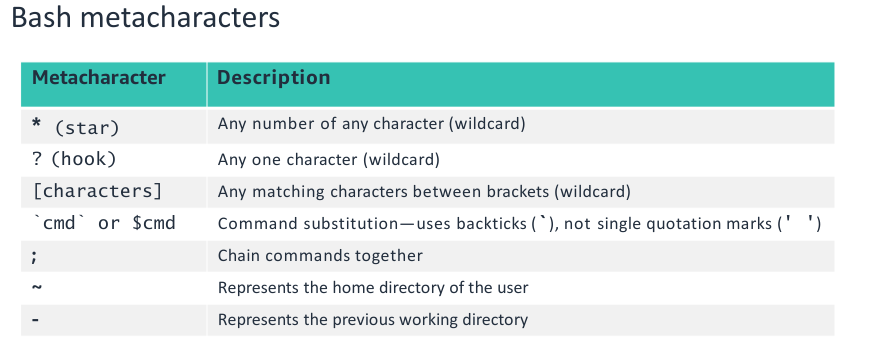

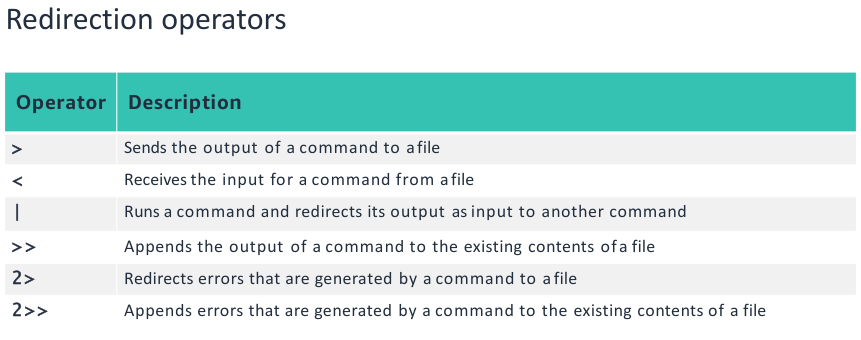

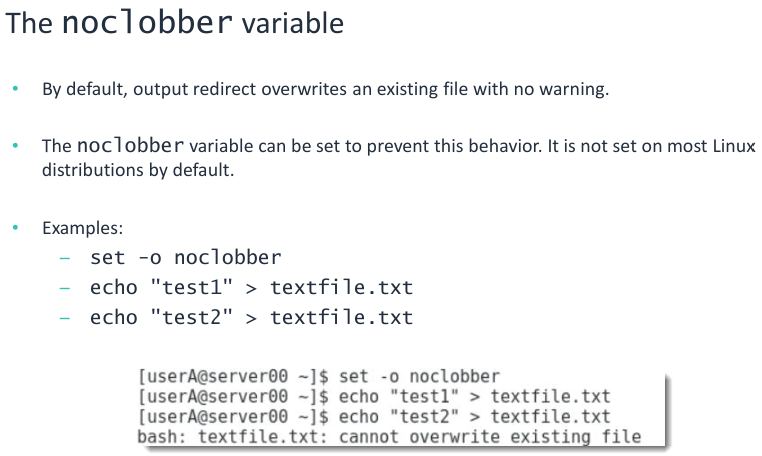

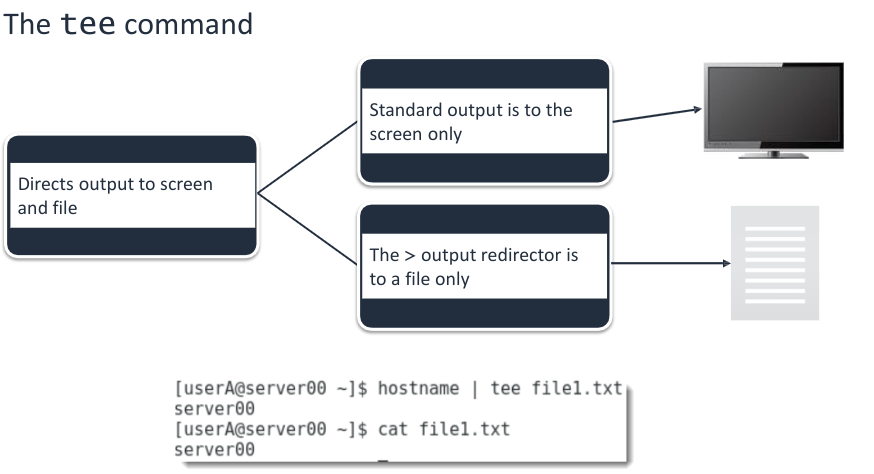

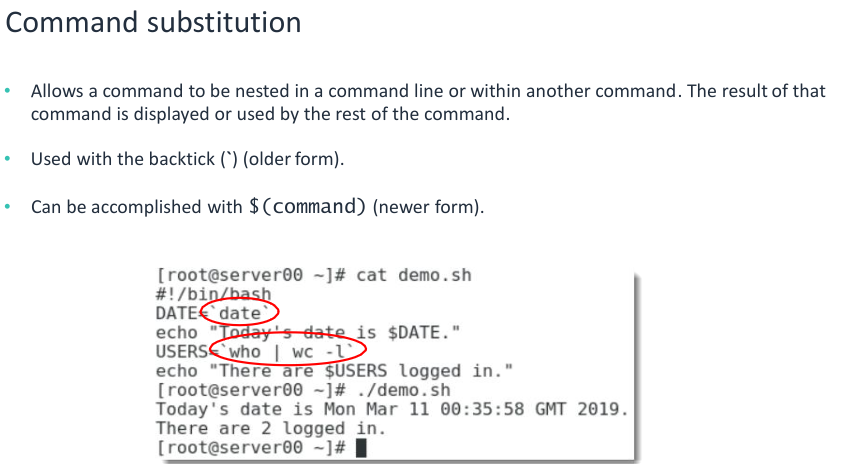

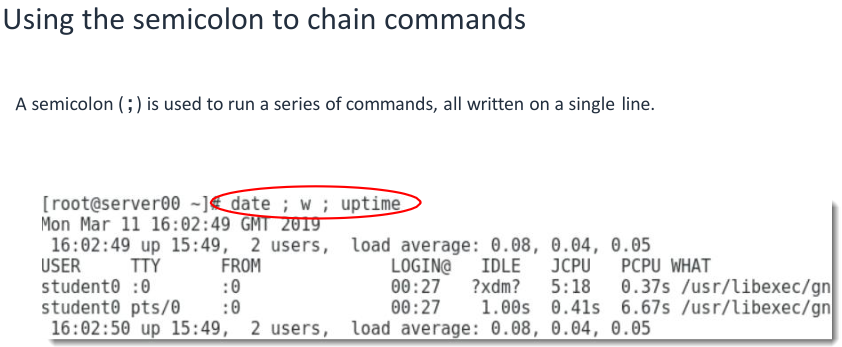

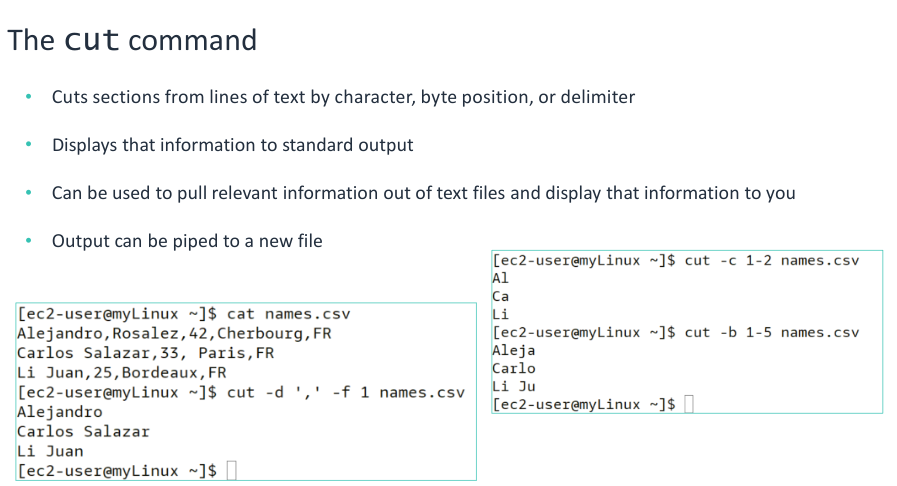

- `b` - Byte
- `c` - column
- `f` - field
- `d` - delimiter

### Text manipulation and Searching

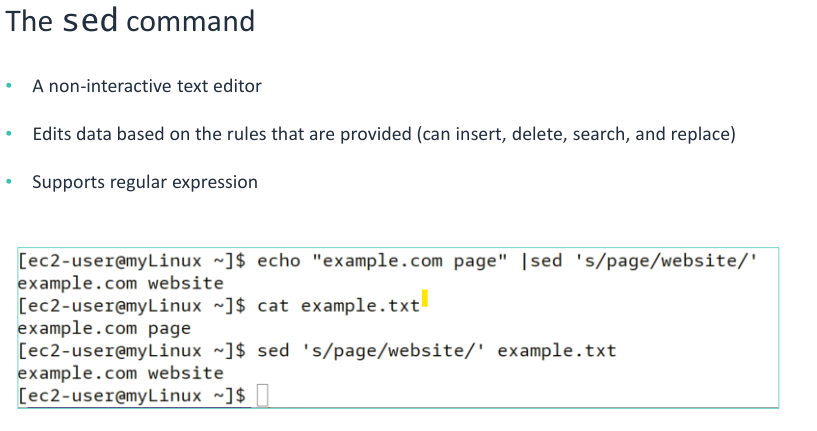

- `sed 's/page/website/' example.txt` replaces `page` occurrences with `website` in the `example.txt` file. 
- By default, only replaces first occurrence.
- Use `/g` to replace all occurrences.


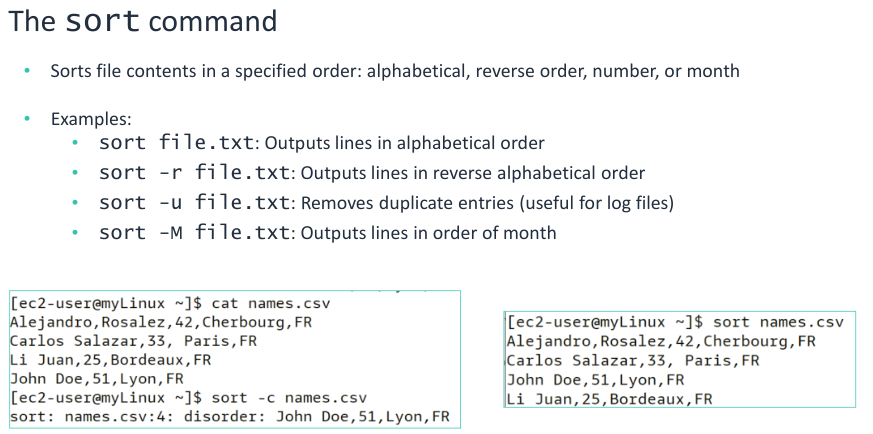

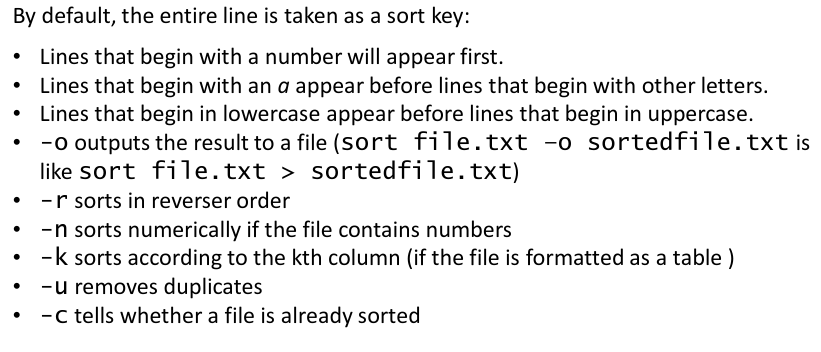

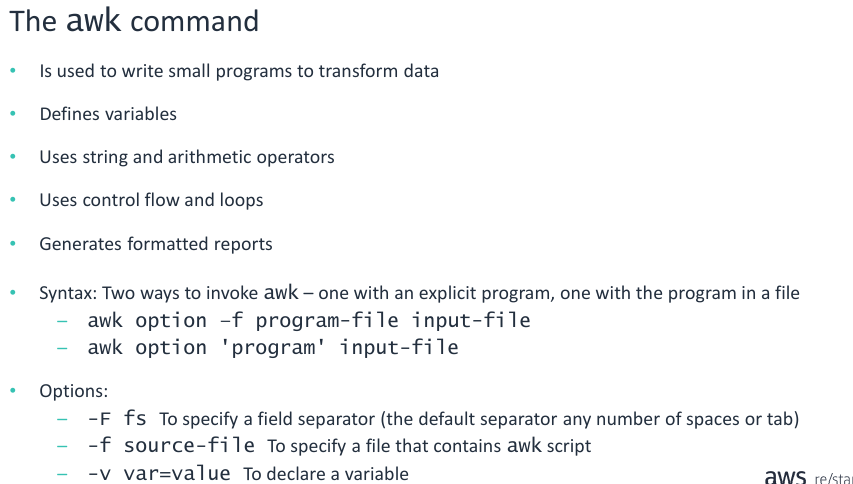

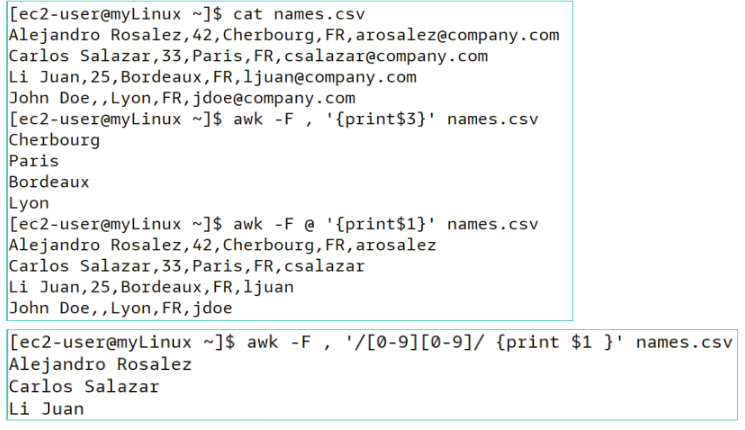

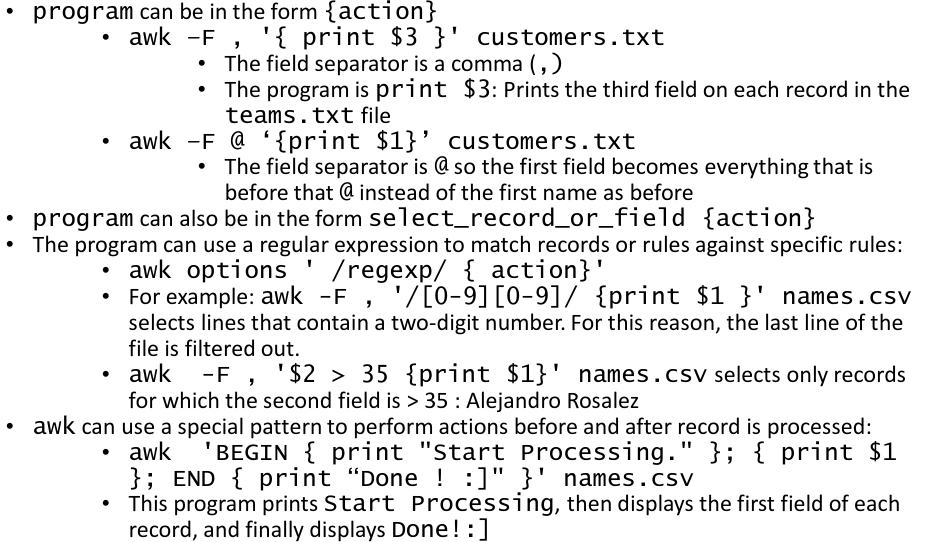

## Linux Processes

### Programs

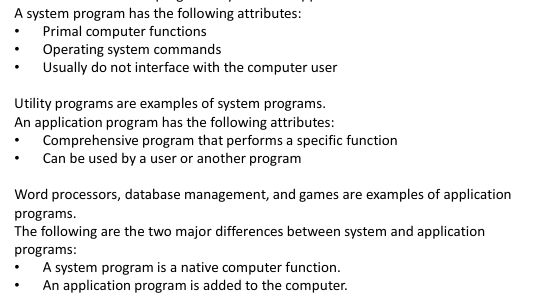

### Process

- A running program identified by its process ID number (PID)
- View by both `ps` and `pstree`

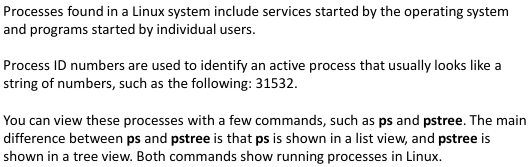

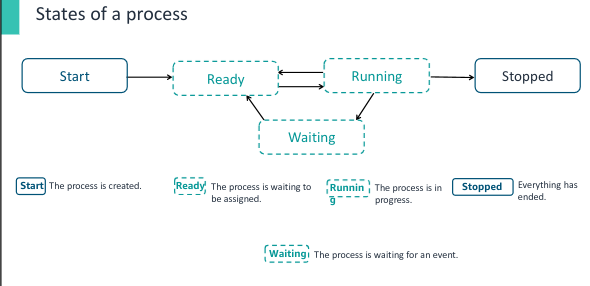

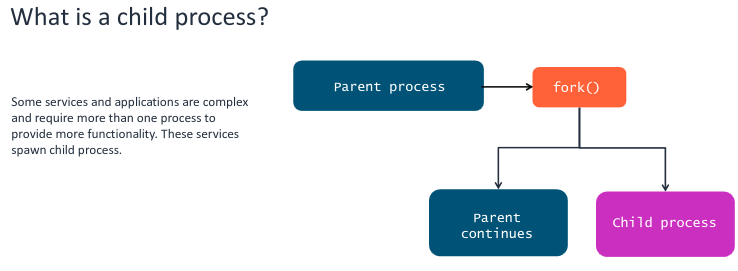

### Process Commands

##### `ps`
- `-e` - List all current processes
- `-b` - Batch mode
- `-fp <number>` - List processes by PID
- `-a` - Display all processes not associated with a terminal. Otherwise, use `-T` for those with a terminal.
- `L` - list all format specifiers
- `-r` - running processes only

##### `pidof`

Shows PID of a running program.

```pidof [options] programName```

##### `pstree`

Shows process ID as a tree form. Starts from root process then branches out to parent and child process.

`pstree [options] [pid, user]`

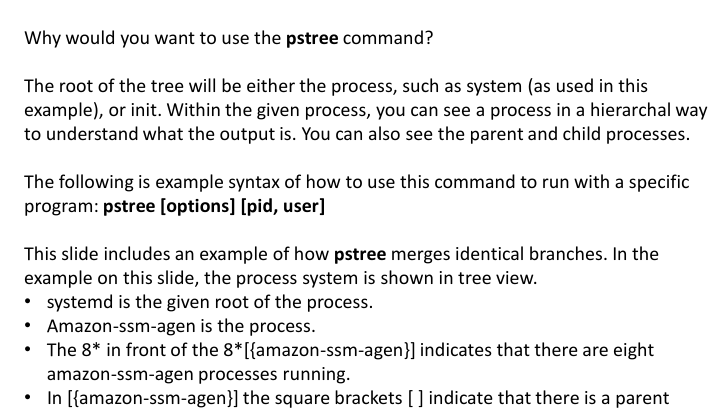
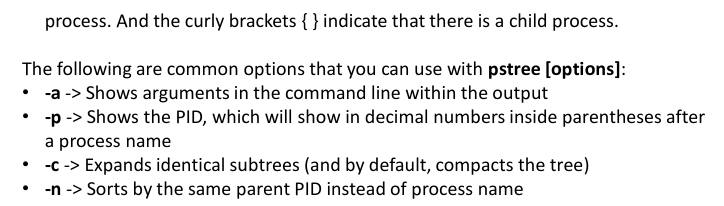

##### `top`

Displays real-time summary of system performance and utilization and lists the processes and threads active in the system.

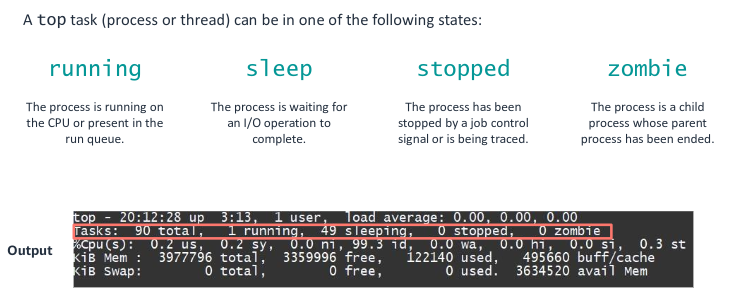

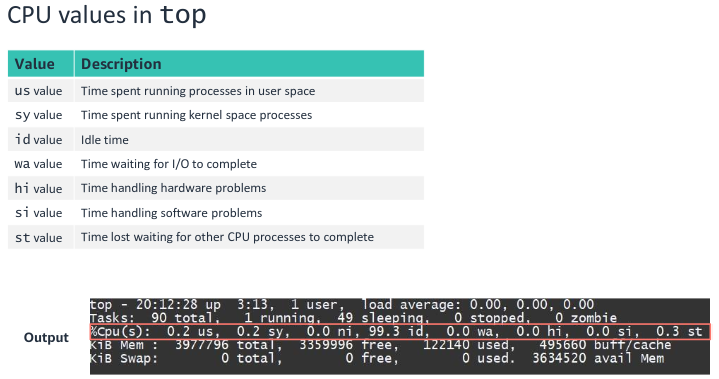

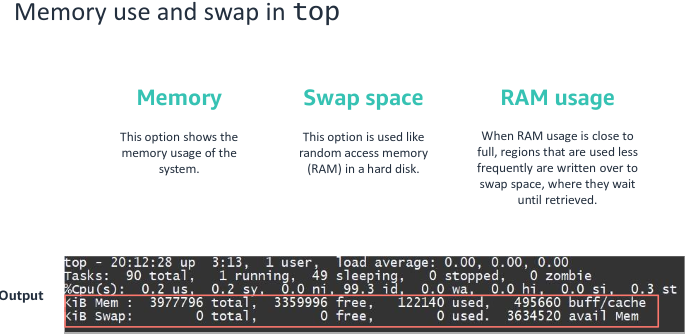


##### `kill`

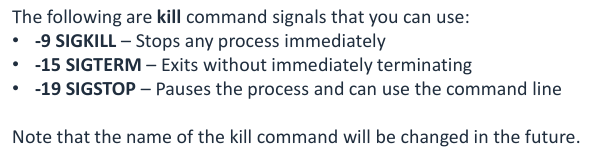

##### `nice`
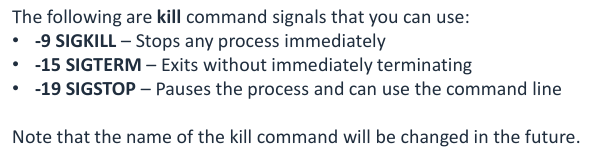

##### `renice`
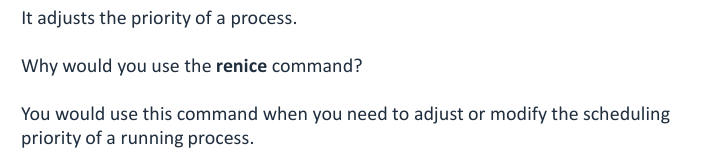

##### `jobs`

Processes that users start and manage that are ideintified by a job number.

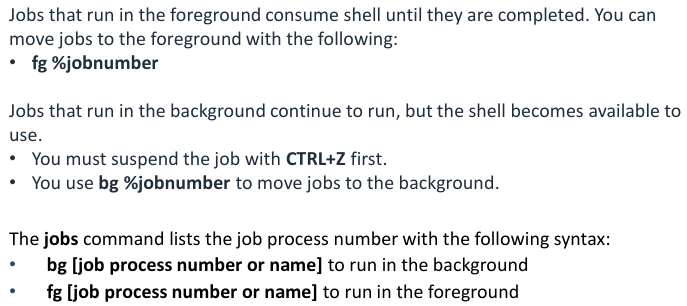

##### `at` 
Runs a task once at a specified time.

##### `cron`
Runs a task on a regular basis at a specified time.

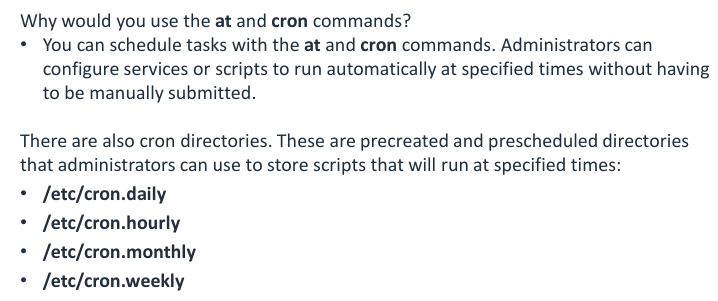

##### `crontab` 

Creates a `crontab` that holds the commands and steps that the cron `daemon` will run.

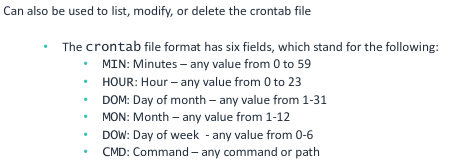

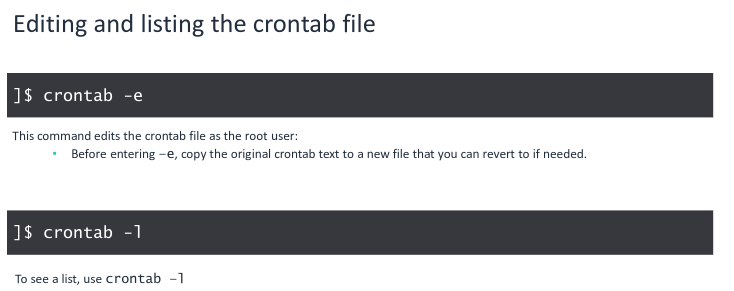

## Linux Services

Sercies provide functionality such as networking, remote administration, and security.

### `systemctl`
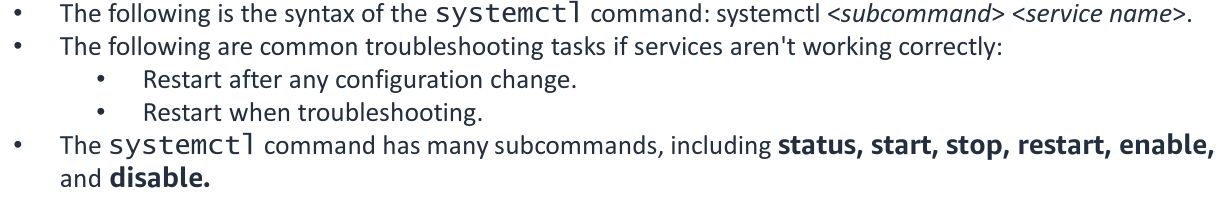
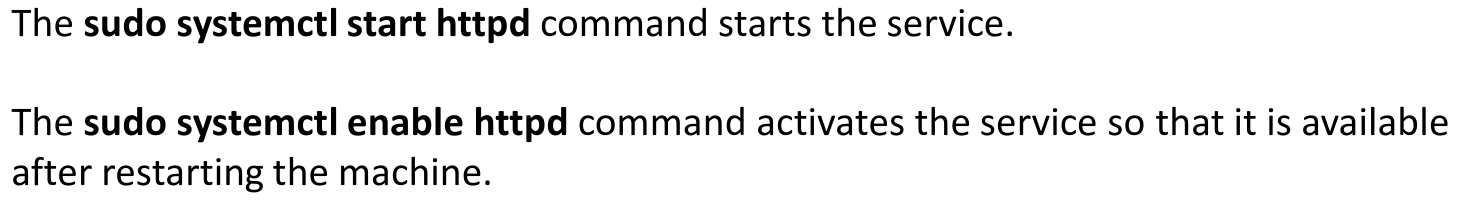

Show all running services:
```systemctl```

Show all services whether active,exited, or failed:
```systemctl list-units --type=service```

Show all active services:
```systemctl list-units --type=service --state=active```

### Monitoring in Linux

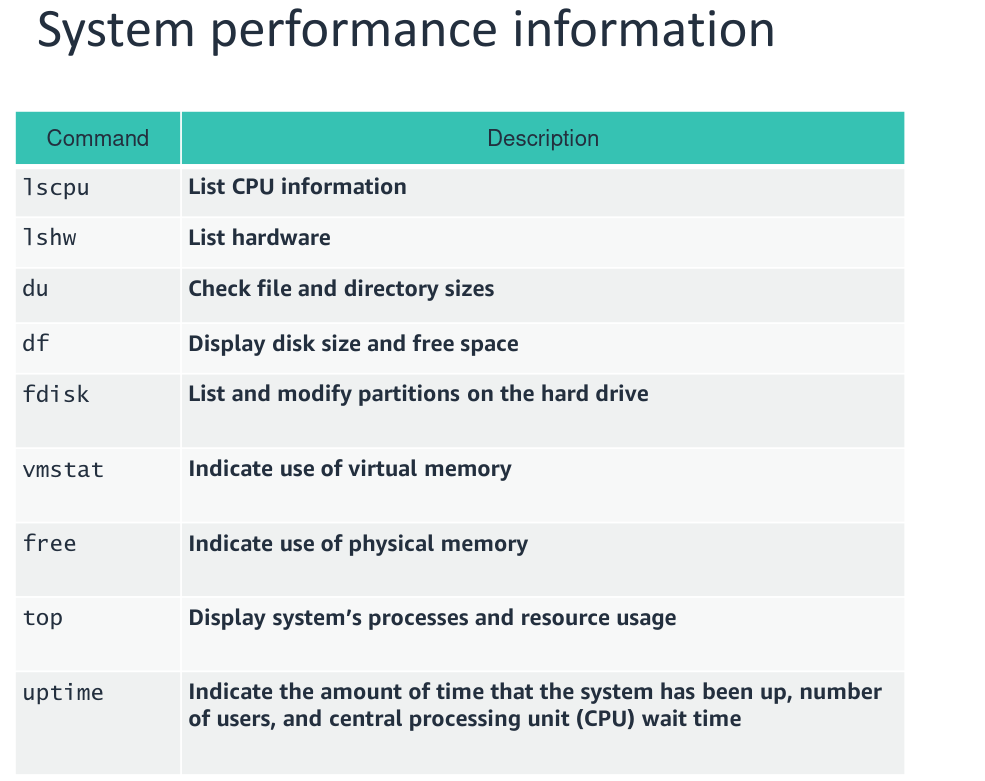

### Monitor with Amazon CloudWatch

- Monitors health and performance of AWS resources and applications.
- You can create alarms for different events. The notification is sent through **Amazon Simple Notification Service**.

## The Bourne Again Shell (Bash)

- Command language interpreter for the GNU operating system.
- A **shell** is an environment in which programs, commands, and shell scripts are run. Usually, it is multi-language supported.


#### Shell Variables

- `name=value` - Stores variables that can be a string, number, or special characters.
- Common naming is capitalize/lower cases and no spaces (replace with __). Alphanumeric variables only.
- By default, all variables are treated as stirngs. No space between the variable name and the value.

### Environmental Variables

- They are no different from shell variables
- With environmental variables, you can pass info about the current operating envrionment to a program running.
- Application and daemons reference environment varaibles as needed.

### Understanding the Bash Environment and the `env` Command

- `env [options]` views environment variables.

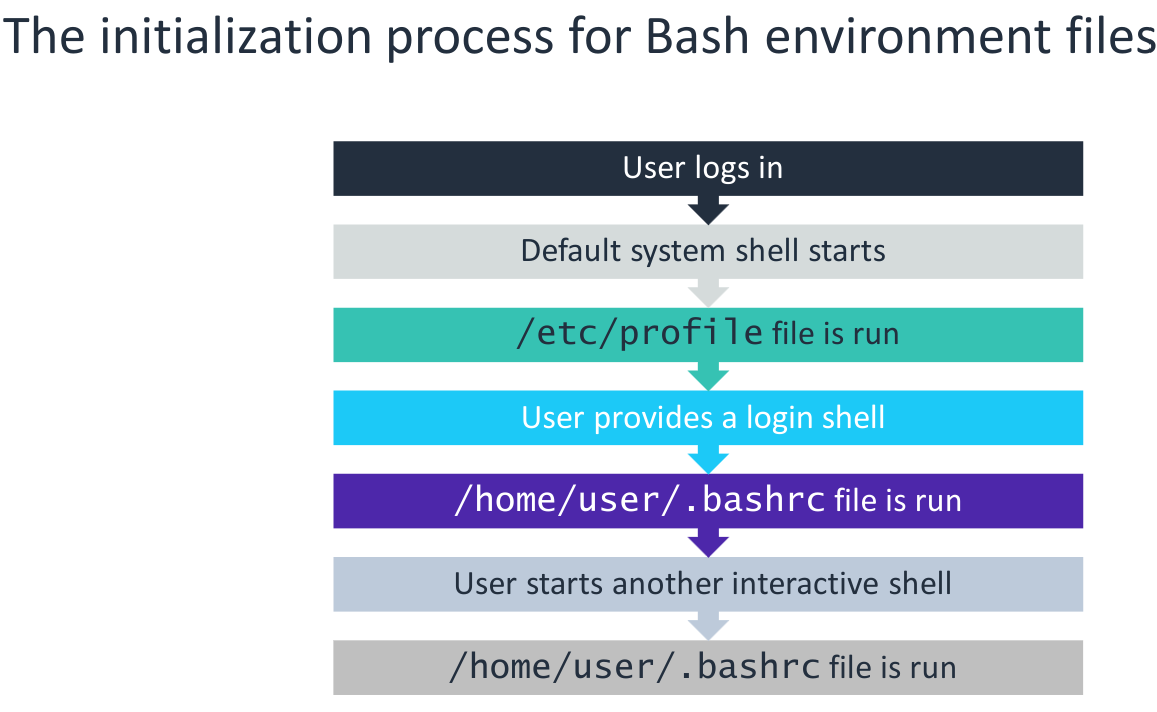

- `/etc/profile` contains system-wide environemnt configurations and startup scripts for login setup. When you log in, Bash reads the instruction inside to set the shell variables.
- `/etc/bashrc` contains system-wide functions and aliases, including configs that apply to all users.

### `alias`

```alias alias_name='command'```

Can be added to `~/.bashrc` so that it is at default, for the user.

## Bash Shell Scripting

For the whole bash shell scripting documentation, see [here](https://www.gnu.org/savannah-checkouts/gnu/bash/manual/bash.html#Shell-Syntax).

- `#!` - *shebang*. Defines the interpreter to use. Location and shell can also be different, but each shell has its own syntax.
- `#!/usr/bin/bash` means that the command must use the bash. It does not serve any other purpose than to nitofy the user.

### Script Documentation
- Title
- Purpose
- Parameter, flags, options
- Authored
- Special Instructions or Examples

### Some commands
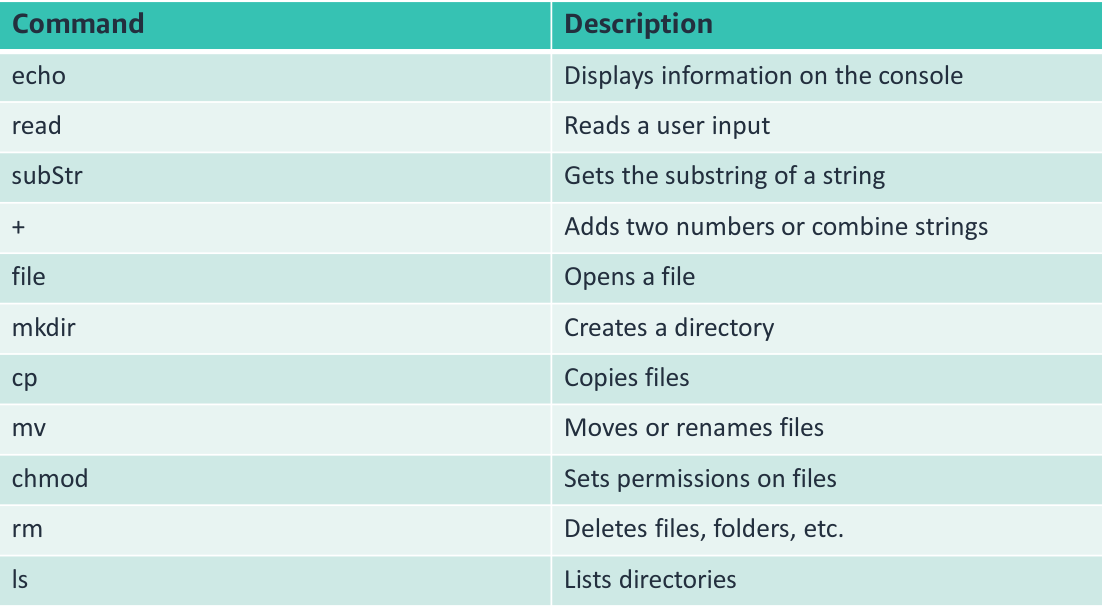

### Operators
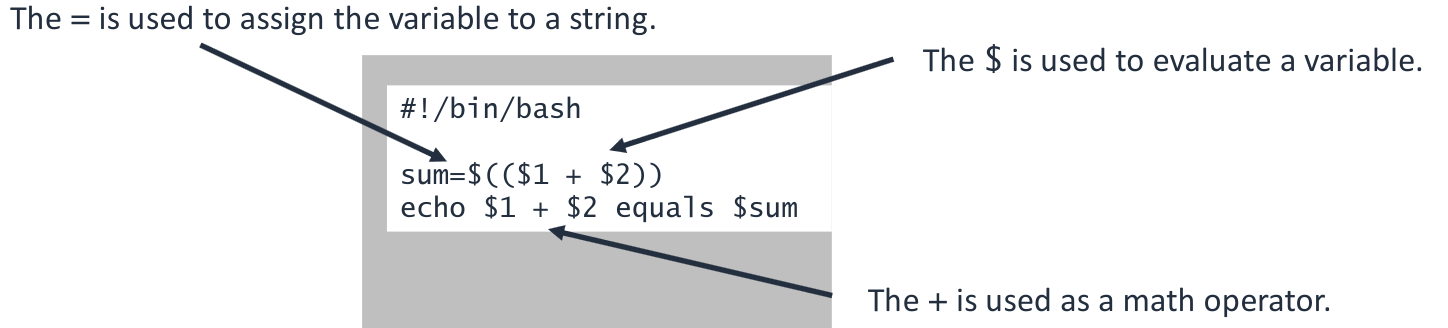

### Arguments
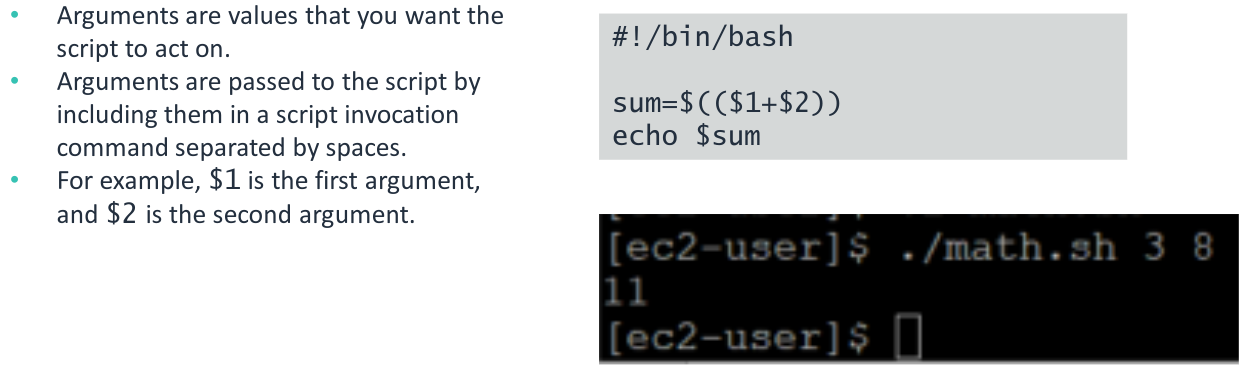

### Expression
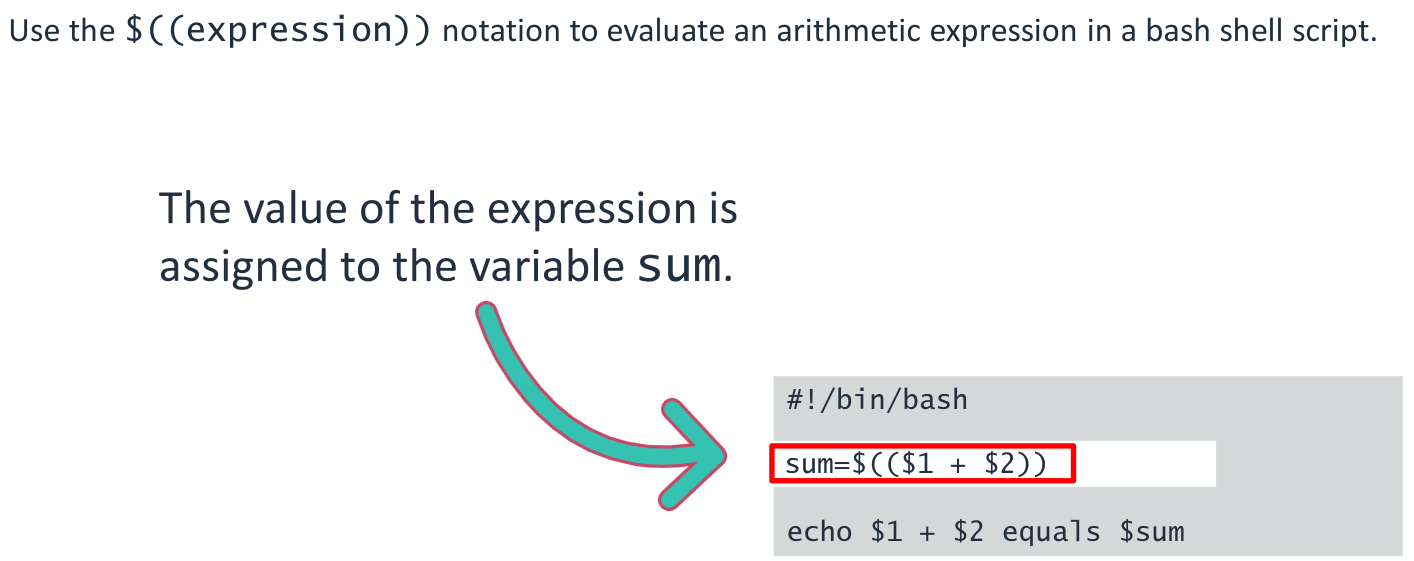

### Conditionals
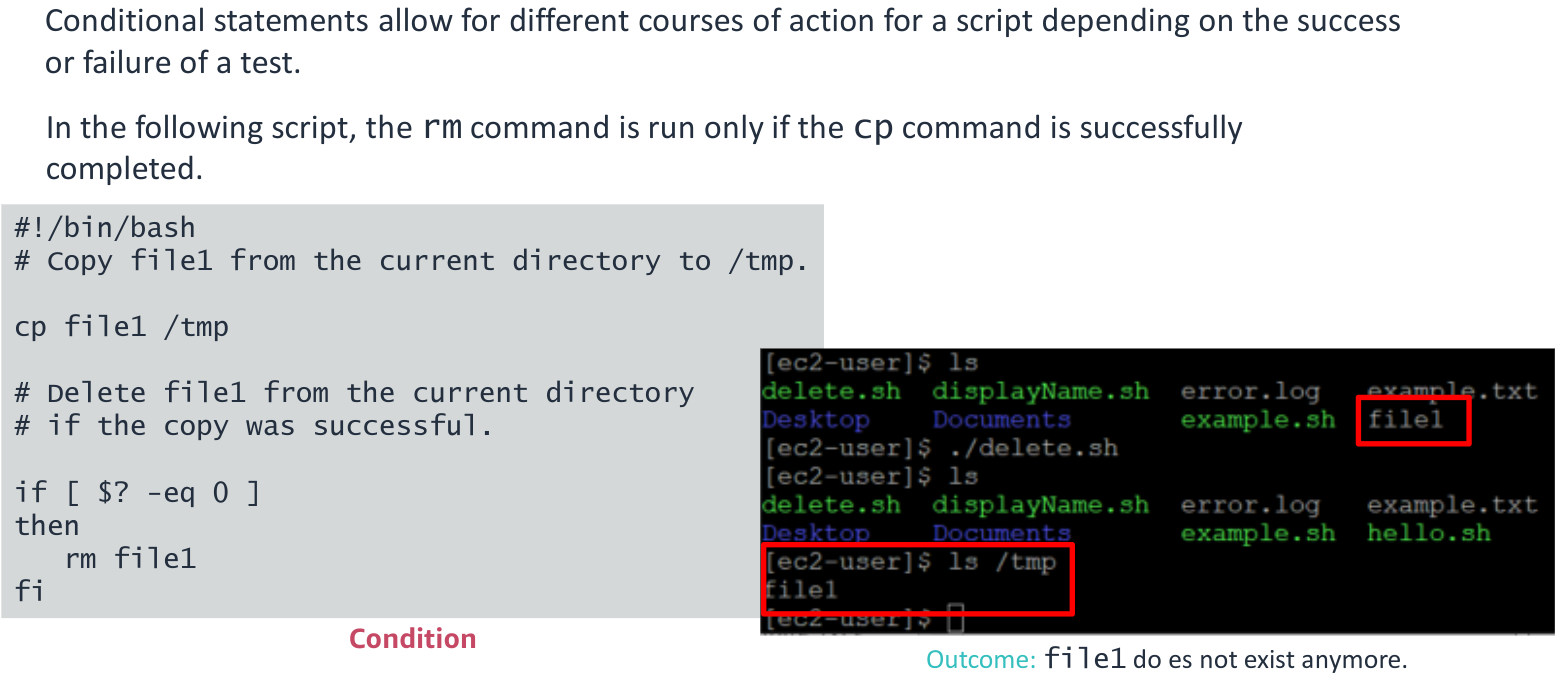
- The `$?` contains the exit status code of the last command. If it was successful, it is 0 else it is 1.

### Logical control

First code block:
```
if [condition]
then
    command 1
else command 2
fi
```

Second code block:
```
test <expression> && echo 'String1' || echo 'String2'
```

### Integer Comparison Operators
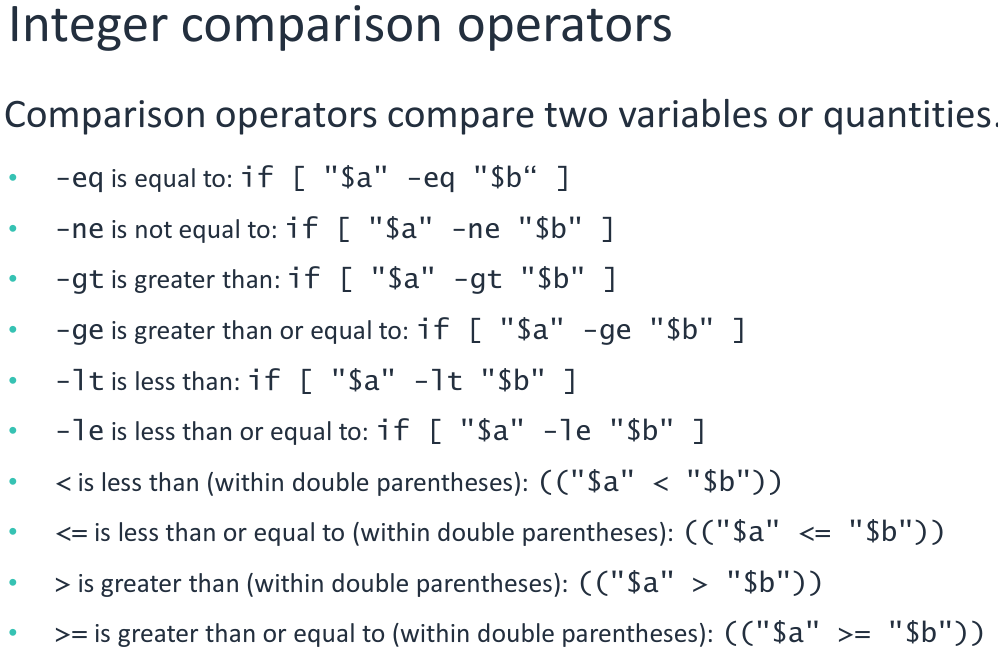
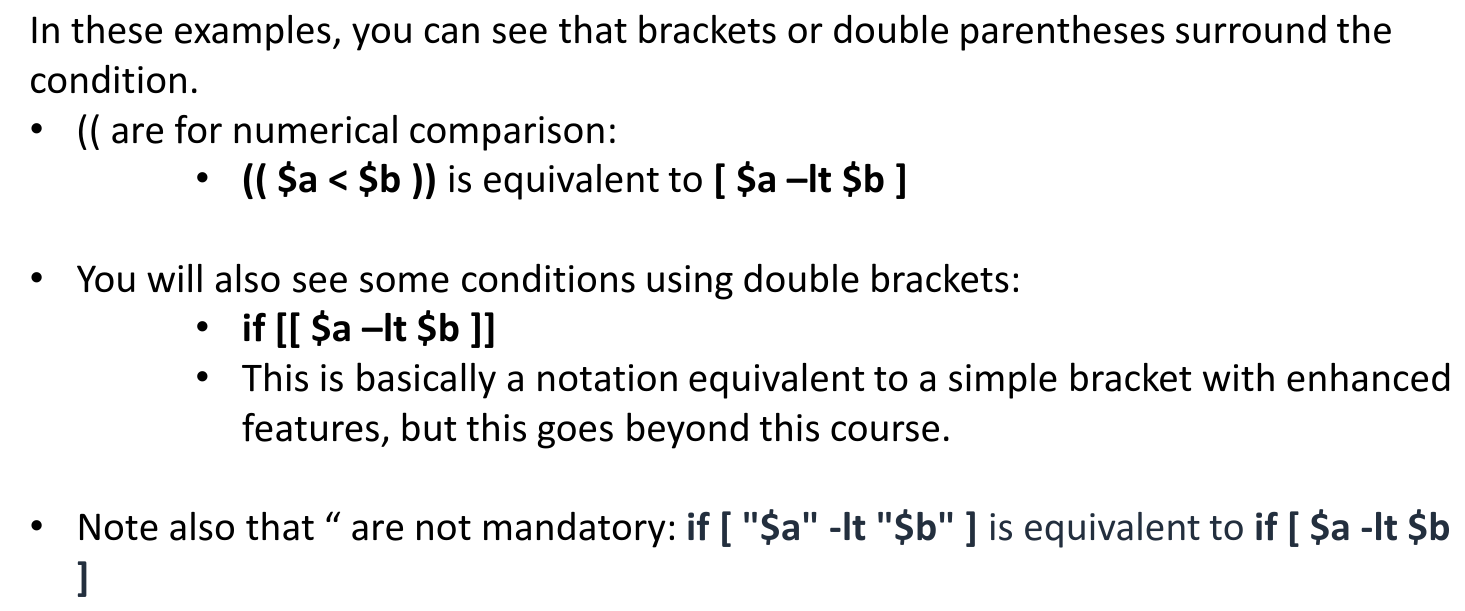

### String Comparison Operators
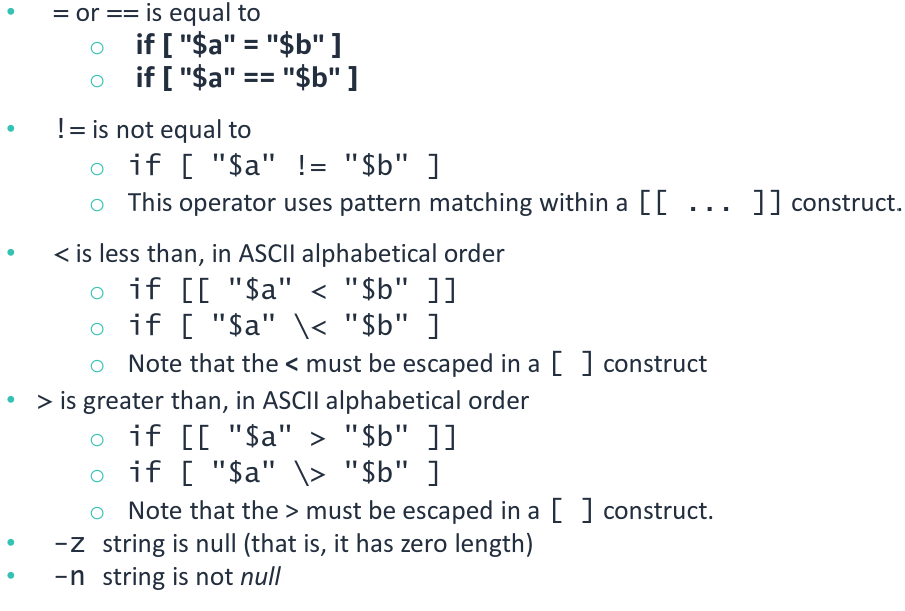

### Loops
- `for`

```
for x in <iterable>
do
    command
done
```

- `while`
```
while [condition]
do
    command
done
```

- `until`

``` 
until [end condition]
do
    command
done
```

#### `break`
Added inside the command to exit the loop early just like in other languages.

#### `continue`
Similar as well to continue in Python where it skips the process of that condition.

### `exit`
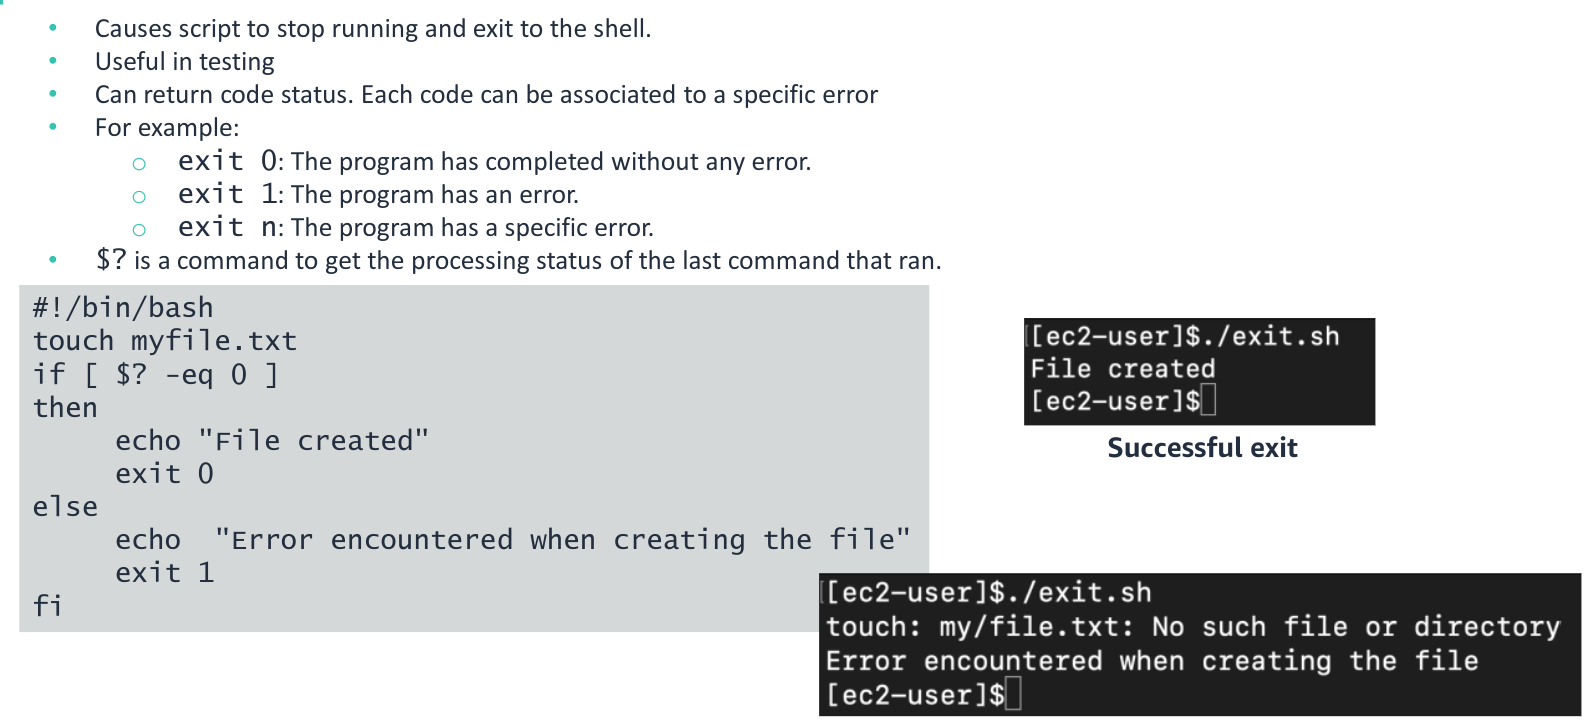


## Linux Software Management

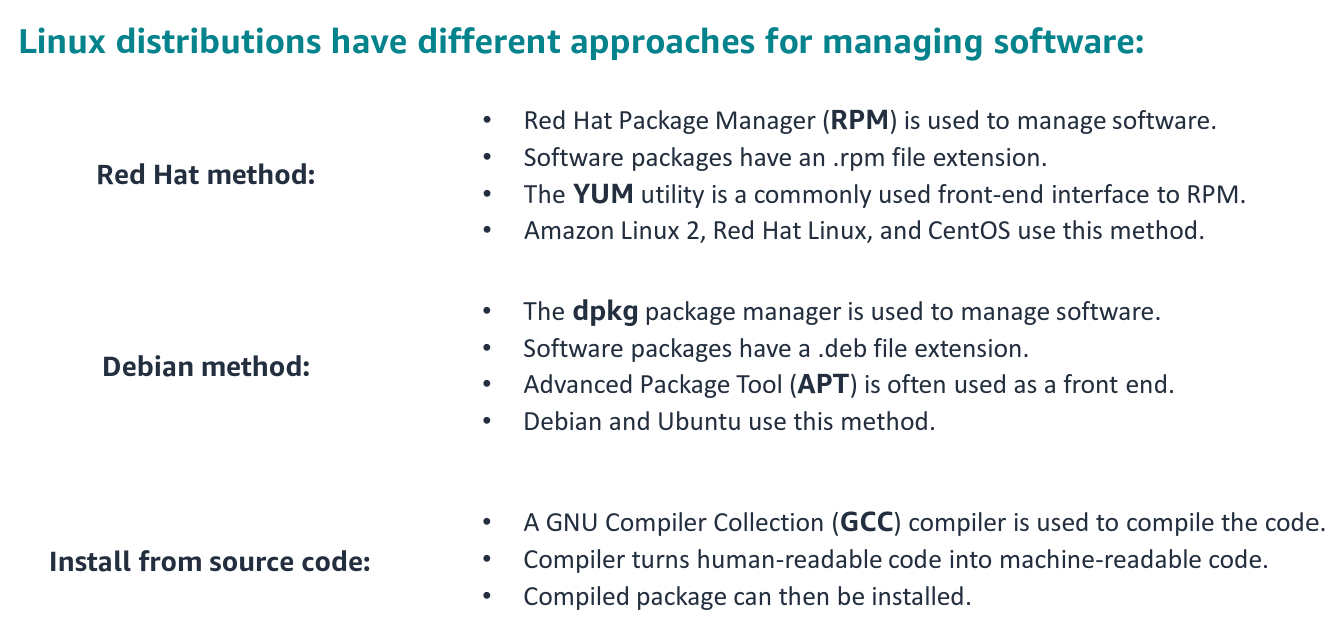

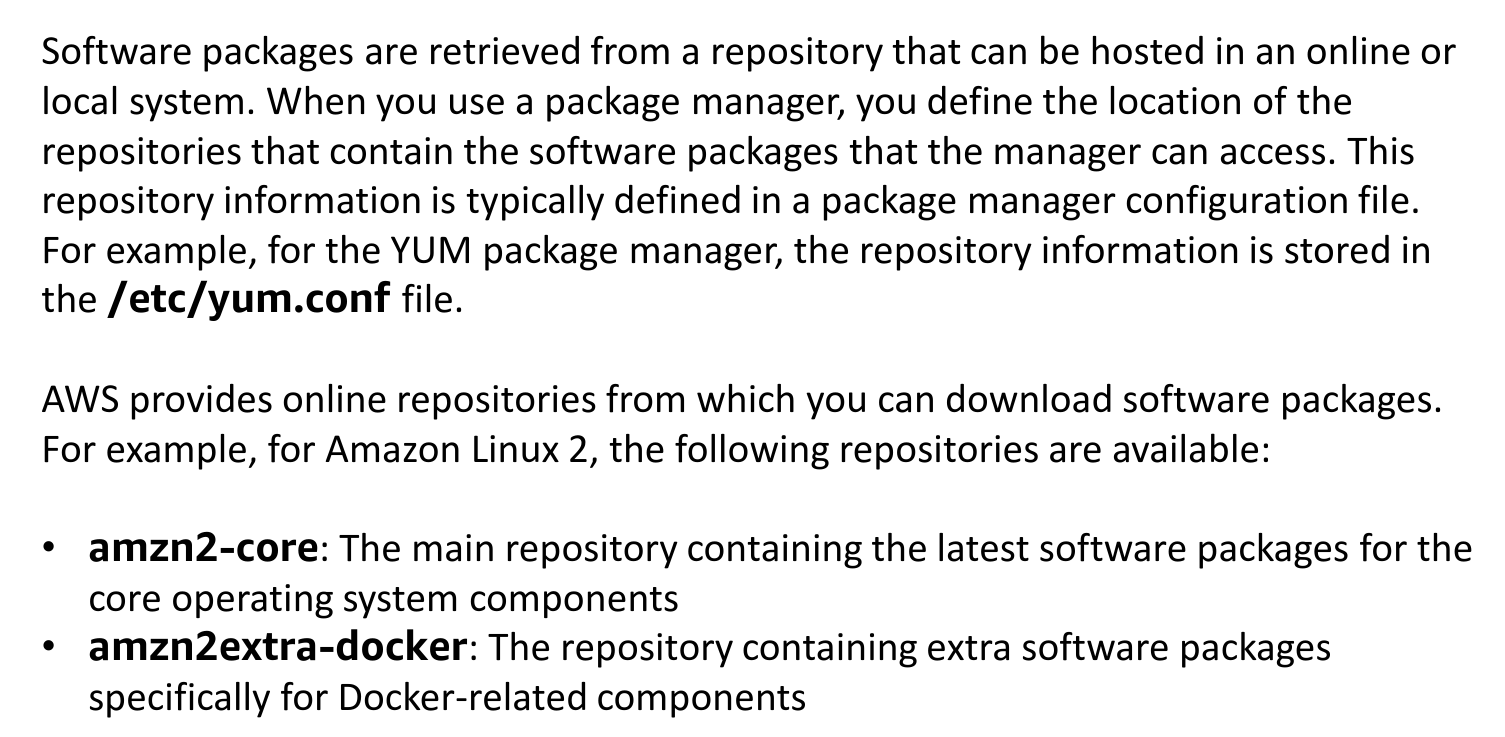

### Installing Software from Source Code

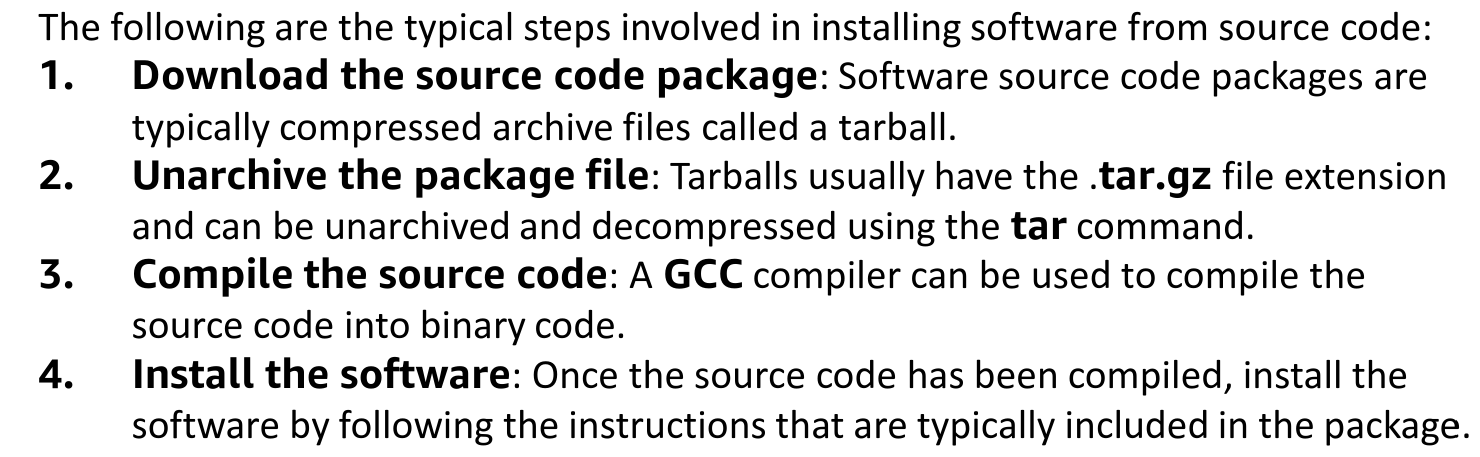

### File Retrieval

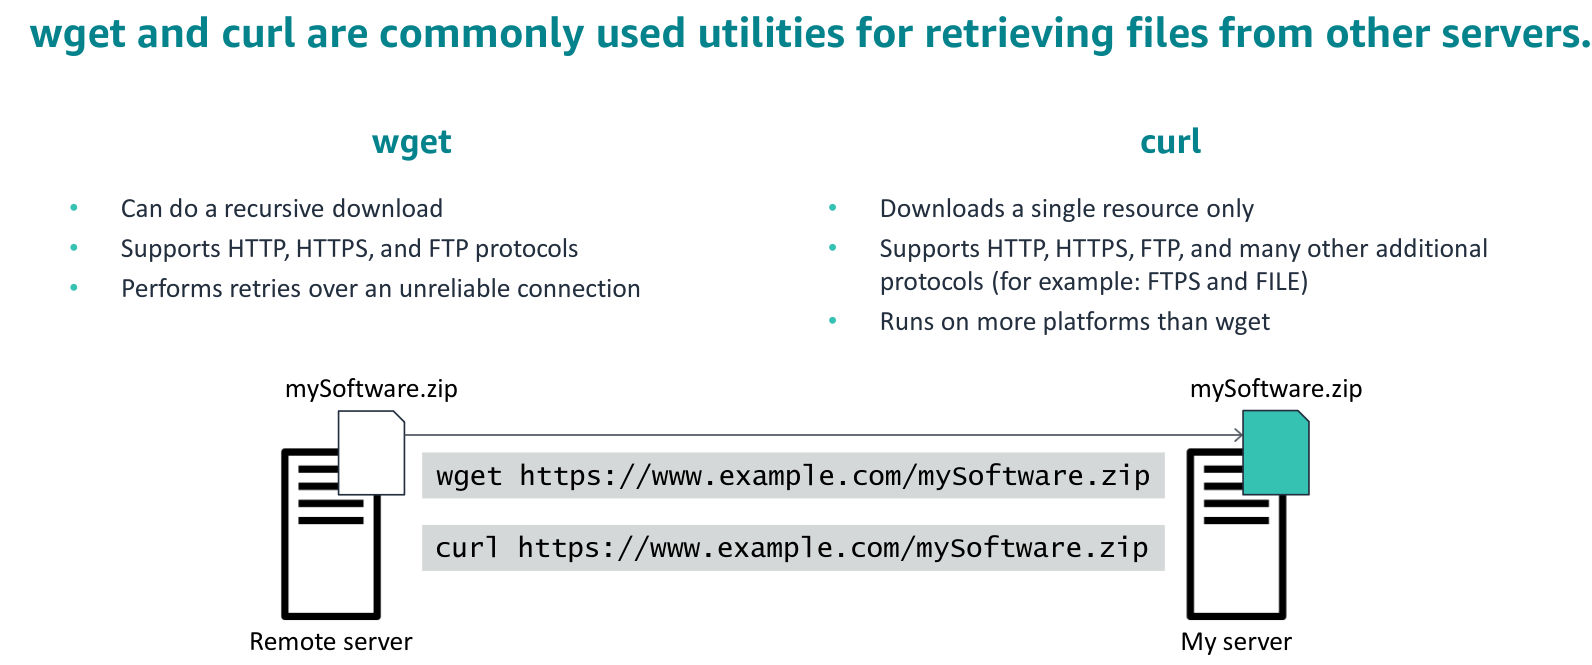

## Logging in Linux

- keeps records of events on the system, useful in auditing.
    - System logs (Startup/shutdown information)
    - Event logs (user loging and logout events)
    - Application logs (startup time, actions, errors)
    - Service logs


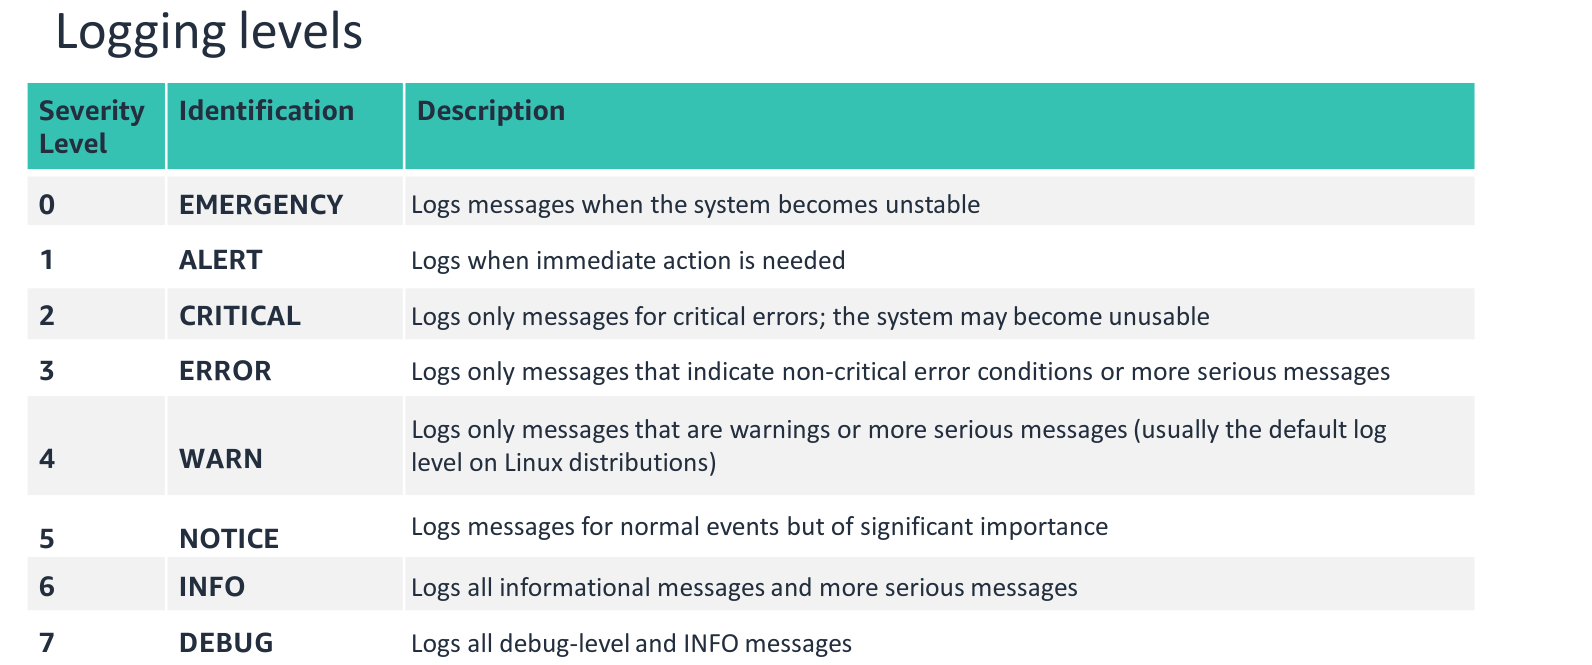

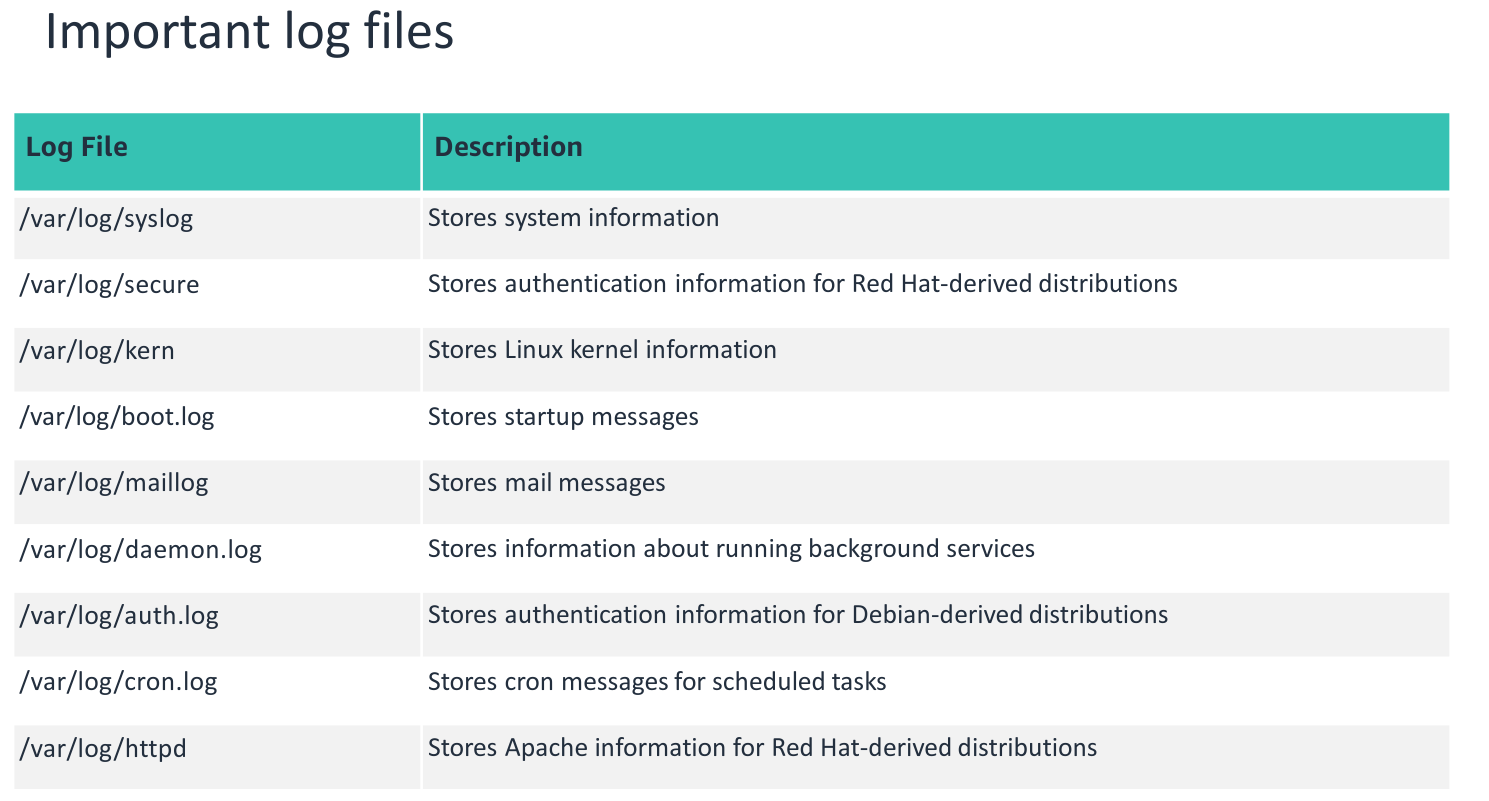

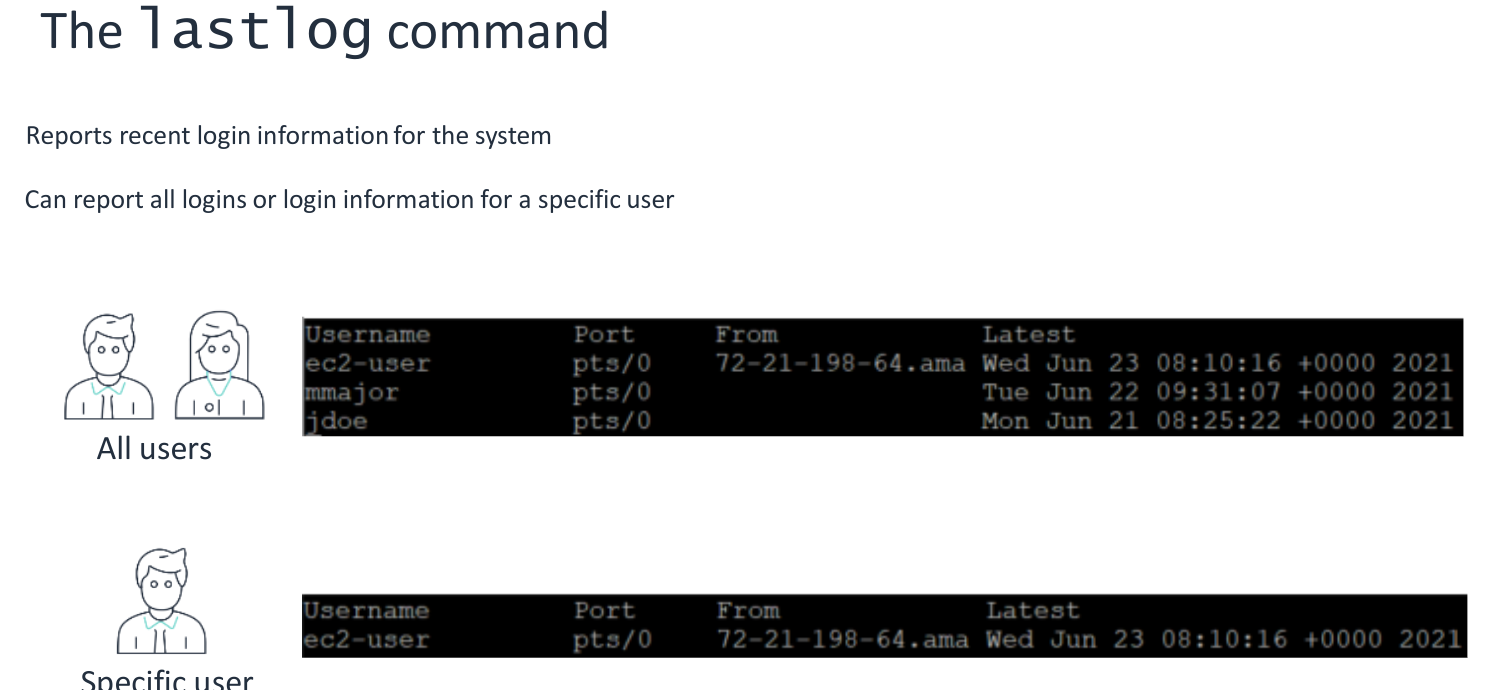

### Log Rotation

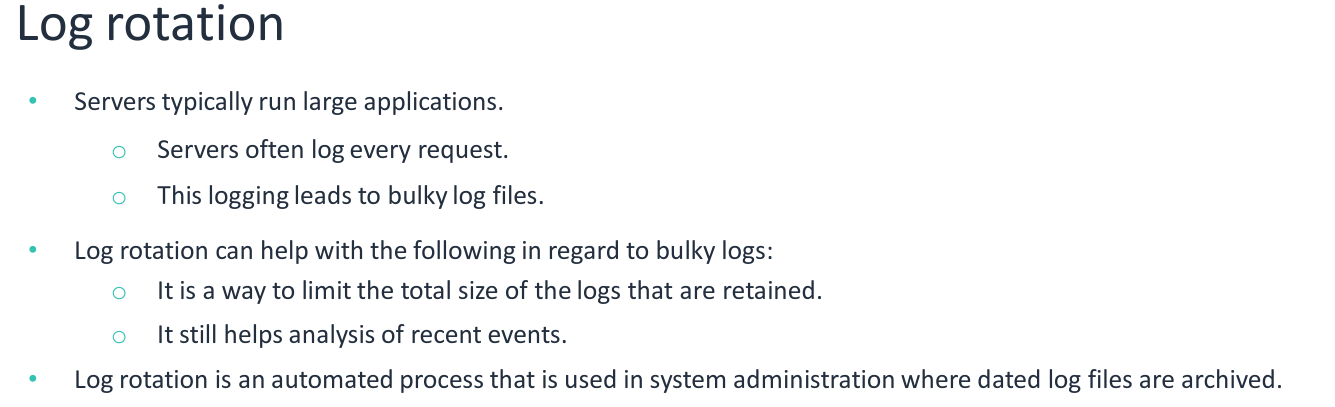

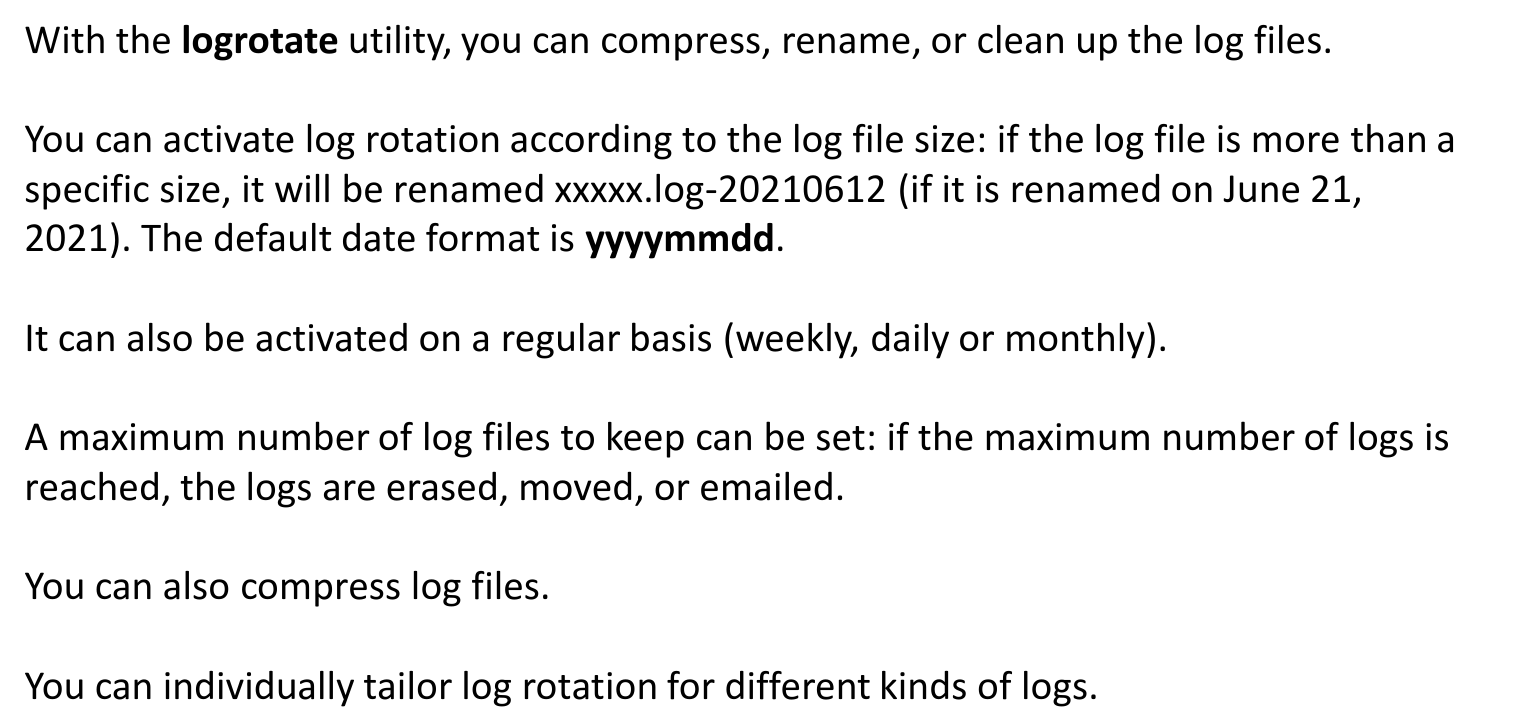